In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
import tensorflow as tf

In [3]:
#importing all the libraries need to implement the models
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk import pos_tag
from nltk.corpus import wordnet
from keras.utils import to_categorical
from keras.models import Sequential
import keras
from keras.layers import Dense, LSTM, Embedding, Input
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer #importing the vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [6]:
import regex as re
!pip install Unidecode
from unidecode import unidecode

In [7]:
file_path = r"C:\Users\vicky\Documents\python\DS_ML\ds_priya\test.csv"

In [8]:
test = pd.read_csv(file_path)

In [9]:
file_path2 = r"C:\Users\vicky\Documents\python\DS_ML\ds_priya\train.csv"

In [10]:
train = pd.read_csv(file_path2)

In [11]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [12]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [14]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
toxic_comment = train.drop(['id', 'comment_text'], axis=1) #different labels of toxic
toxic_comment

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


Data visualisation and analysis


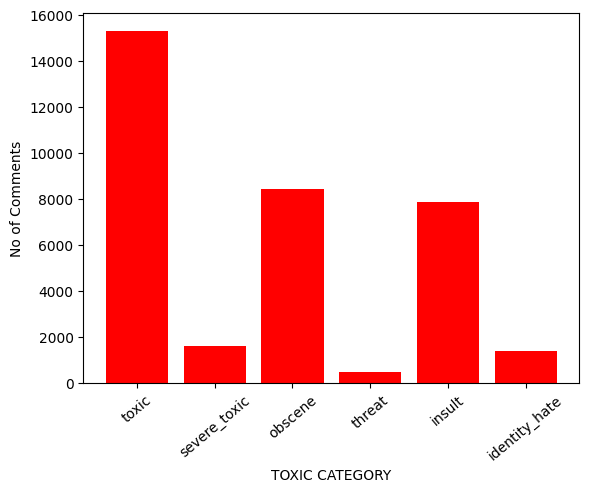

In [16]:
# generating the bar graph to compare the count of each labels
Toxic = toxic_comment
ValueCounts = []
subdivisions  = list(Toxic.columns.values)
for f in subdivisions:
    ValueCounts.append((f, Toxic[f].sum()))
ValueCounts
lab=[] #empty list to store the labels of dataset
val=[] #empty list to store the count of the values
for i in ValueCounts:
    lab.append(i[0])
    val.append(i[1])

plt.bar(lab,val,color='red')
plt.xticks(rotation=40)
plt.xlabel("TOXIC CATEGORY")
plt.ylabel("No of Comments")
plt.show()

From the graph above we can clearly see that our dataset set is imbalanced. We need to make our dataset balanced so that our model does not overfit's the data. Firstly lets try and run the model without performing any balancing operations on the dataset.

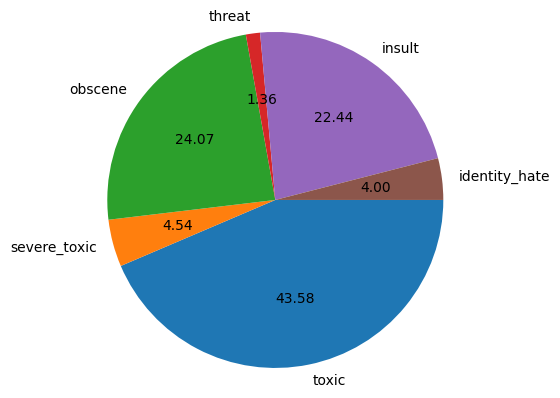

In [17]:
plt.pie(val,labels=lab,autopct='%.2f',counterclock=False)
plt.axis('equal')
plt.show()

In [18]:
cols=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


Split Data into Feature (Comment) and Target Classes

In [19]:
comments = train['comment_text'].values
detection_classes = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [20]:
target_classes = train[detection_classes].values

<Axes: >

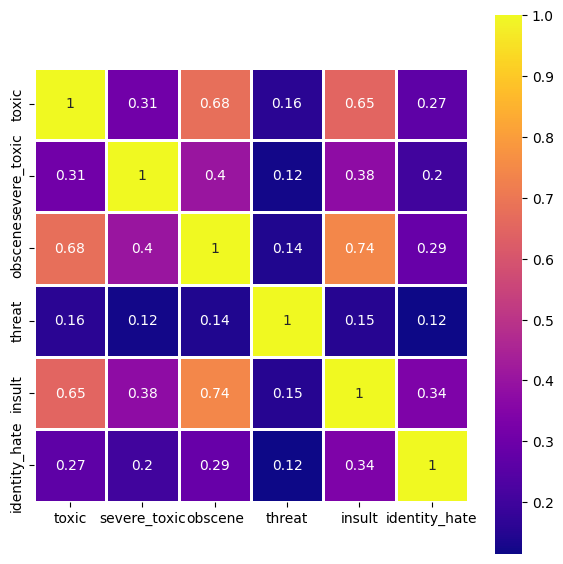

In [21]:
color = plt.cm.plasma
plt.figure(figsize=(7,7))
sns.heatmap(train[detection_classes].corr(),annot=True,cmap=color,linewidths=2,linecolor='white',square=True)
     

Length Information of Comments

In [22]:
# Max and Min Length
print(f'Maximum length of the comments {max(len(s) for s in comments)}')
print(f'Minimum length of the comments {min(len(s) for s in comments)}')

# Median Length
s = sorted(len(s) for s in comments)
print(f'Median length of the comments {s[len(s) // 2]}')

Maximum length of the comments 5000
Minimum length of the comments 6
Median length of the comments 205


## Pre-processing the data

# Comments cleaning


First of all, make convert all text to its lowercase.
In this part, it is necessary to check whether any row of comments has null values, if it has then fill it.
If a comment contains words like i'm or what's, then change it to its full form.
If a comment does not contain any null values but contains only whitespace/s then remove those white spaces with a single white space.
It can happen that a comment/word may not have any letters, replace the comment/word with a single space.
By mistake, if there are some leading and trailing whitespaces present, then remove them also.

In [23]:
# checking for null values
train['comment_text'].isnull().sum()
test['comment_text'].isnull().sum()
     

np.int64(0)

In [24]:
stop = stopwords.words('english') #As our training dataset is in only one language I am only importing the english stopwords 
puncutations = string.punctuation #From string package we can retrieve the list of puntuations using string.punctuation 
stop = stop + list(puncutations) #adding the list of puntautions on the array we created for stop words
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

Removing annotation

In [25]:
def annotation(data_text):
    annotation_sentence = re.sub('[^a-z A-Z]+', ' ', data_text)
    return annotation_sentence

In [26]:
"""
Making the sentenses to lower case so that it can be passed in lemmetizing and stop words removal function
"""
def lower(data_text):
    lower_sentence = data_text.lower()
    return lower_sentence

Lemmatiztion

In [27]:
def lem(data_text):
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(d, 'v') for d in data_text.split()] #tokkenizing the words
    lem_sentence=' '.join(lem_words)
    return lem_sentence

Removing the stop words and puntuations

In [28]:
"""

from  string package list of punctuation can be extracted. After extracting the list of punctuation I have added it to the list 
of stop words so that after each and every iteration I have remove stop words and punctuation together.

"""
def stop_words_removal_puntuations(data_text):
    stop = list(set(stopwords.words('english')))
    puncutations = string.punctuation
    stop = stop + list(puncutations)
    stop_count=[d for d in data_text.split() if d not in stop]
    #print(stop_count)
    stop_count_sentence = ' '.join(stop_count)
    return stop_count_sentence

Calling all the above funtion

In [29]:
"""
This function will call all the above function one by one for cleaning data.
"""
def preprocessing_text(sentence):
    processed_sentence = annotation(sentence)
    processed_sentence = lower(processed_sentence)
    processed_sentence = lem(processed_sentence)
    processed_sentence = stop_words_removal_puntuations(processed_sentence)
    
    return processed_sentence

In [30]:
def cleaning(data):
    text_data=preprocessing_text(data)
    return text_data

In [31]:
train['Cleaned_data'] = train['comment_text'].apply(cleaning)


In [32]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_data
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edit make username hardcore metall...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stick th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wonder secti...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


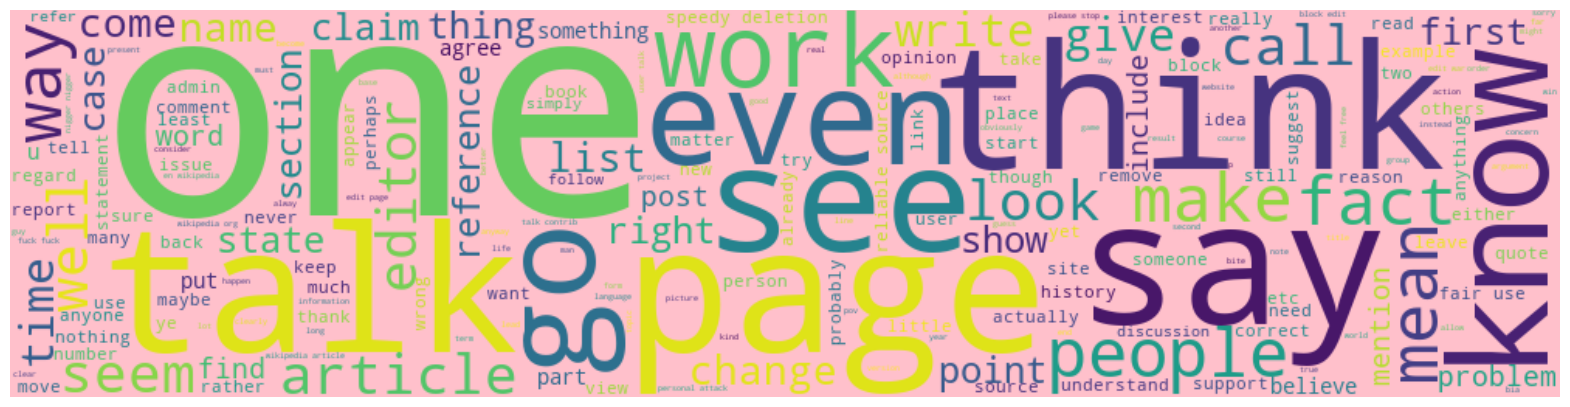

In [33]:
words = ' '.join([k for k in train['Cleaned_data']])
W_C = WordCloud(width=1000, height=250, random_state=31, max_font_size=200,background_color='pink').generate(words)

plt.figure(figsize=(20,8))
plt.imshow(W_C, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
test['Cleaned_data'] = test['comment_text'].apply(cleaning)


In [35]:
test

,id,comment_text,Cleaned_data
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hat sad ...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information update correct fo...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit article
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",totally agree stuff nothing long crap
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw field home plate get faster throw cut ma...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories see change agree cor...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one found nations eu germany law return quite ...


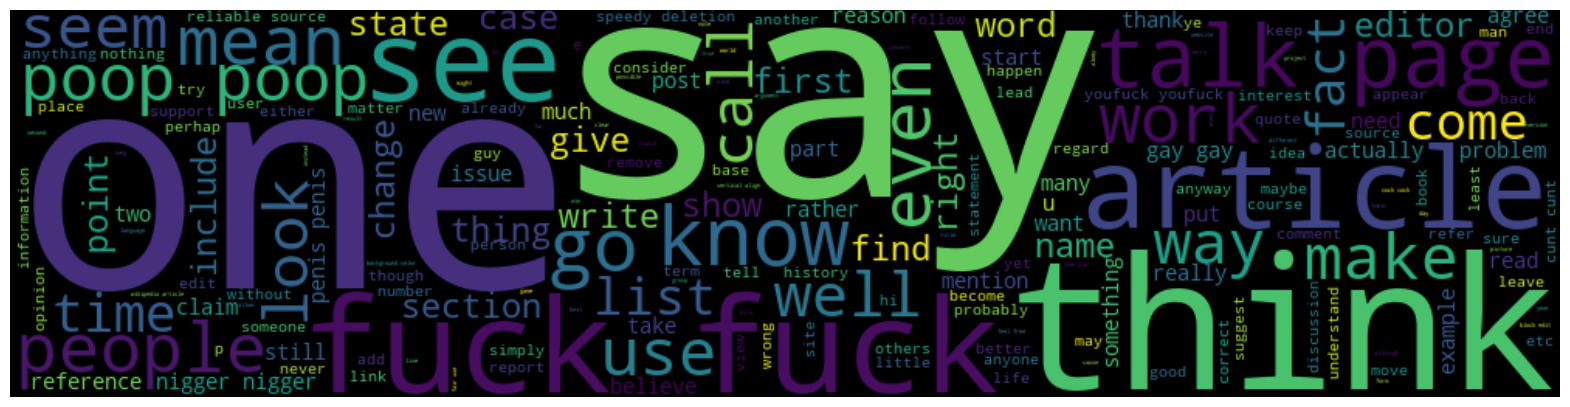

In [36]:
words = ' '.join([k for k in test['Cleaned_data']])
W_C = WordCloud(width=1000, height=250, random_state=31, max_font_size=200).generate(words)

plt.figure(figsize=(20,8))
plt.imshow(W_C, interpolation="bilinear")
plt.axis('off')
plt.show()

Modeling

In [37]:
data_tr = train["Cleaned_data"]
data_ts = test["Cleaned_data"]
train_categories=train[cols]


In [38]:
train_categories
#train_categories.drop(['toxic'], axis=1, inplace=True)
train_categories

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [39]:
tokken=Tokenizer(num_words = 20000) 


In [40]:
tr_final = tokken.texts_to_sequences(data_tr)
ts_final = tokken.texts_to_sequences(data_ts)

In [41]:
max_len=150

tr_padded =pad_sequences(tr_final, maxlen=max_len)
ts_padded =pad_sequences(ts_final, maxlen=max_len)
print(tr_padded.shape)
print(ts_padded.shape)

(159571, 150)
(153164, 150)


In [42]:
import torch.nn as nn
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense


In [43]:
model = Sequential()
model.add(Embedding(20000, 64))
model.add(LSTM(units = 32, dropout = 0.1,return_sequences=True))
model.add(LSTM(units = 32, dropout = 0.1))
model.add(Dense(units = 6, activation = 'relu'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
#optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics = ["accuracy"])
x_train, x_test, y_train, y_test = train_test_split(tr_padded, train_categories, shuffle = True)
model3_LSTM=model.fit(x_train, y_train, batch_size = 100, epochs = 2, validation_data = (x_test, y_test))

Epoch 1/2
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 270s 222ms/step - accuracy: 0.9846 - loss: 0.4583 - val_accuracy: 0.9941 - val_loss: 0.4533
Epoch 2/2
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 239s 153ms/step - accuracy: 0.9942 - loss: 0.4251 - val_accuracy: 0.9941 - val_loss: 0.4528


Using categorical_crossentropy as the loss function our model is overfitting as the categorical_crossentropy assumes the sum of probability of all the classes is 1. This happens in the case of multiclass where 1 sample as 1 class. But our model is multilabel that may be the reason our model is overfitting.



In [45]:
pred = model.predict(ts_padded) #testing the model on testing dataset


4787/4787 ━━━━━━━━━━━━━━━━━━━━ 121s 25ms/step


In [46]:
pred

array([[1.8777014 , 0.19216327, 1.036831  , 0.        , 1.0055665 ,
        0.        ],
       [1.8777014 , 0.19216327, 1.036831  , 0.        , 1.0055665 ,
        0.        ],
       [1.8777014 , 0.19216327, 1.036831  , 0.        , 1.0055665 ,
        0.        ],
       ...,
       [1.8777014 , 0.19216327, 1.036831  , 0.        , 1.0055665 ,
        0.        ],
       [1.8777014 , 0.19216327, 1.036831  , 0.        , 1.0055665 ,
        0.        ],
       [1.8777014 , 0.19216327, 1.036831  , 0.        , 1.0055665 ,
        0.        ]], dtype=float32)

In [ ]:
target_cols = np.array(cols)
final_predict_test = pd.concat([pd.DataFrame(pred, columns=target_cols)], 1)
test_id = test['id']
Comment=test.Cleaned_data
final_predict_test = pd.concat([test_id,Comment,final_predict_test],1)
final_predict_test

TypeError: concat() takes 1 positional argument but 2 were given

In [53]:
"""
here we have created an object for sequential model as we need to pass our data in a sequential format

"""
model = Sequential() 
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid')) #here I have changed the activation layer from softmax to sigmoidal
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
x_train, x_test, y_train, y_test = train_test_split(tr_padded, train_categories, shuffle = True, random_state = 123)
model3_lstm2=model.fit(x_train, y_train, batch_size = 32, epochs = 4, validation_data = (x_test, y_test))

Epoch 1/4
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 2918s 779ms/step - AUC: 0.7368 - loss: 0.1488 - val_AUC: 0.7488 - val_loss: 0.1393
Epoch 2/4
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 780s 197ms/step - AUC: 0.7466 - loss: 0.1427 - val_AUC: 0.7471 - val_loss: 0.1399
Epoch 3/4
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 708s 189ms/step - AUC: 0.7483 - loss: 0.1428 - val_AUC: 0.7492 - val_loss: 0.1400
Epoch 4/4
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 691s 175ms/step - AUC: 0.7474 - loss: 0.1432 - val_AUC: 0.7471 - val_loss: 0.1394


Binary_crossentropy is giving less accuracy as compared to categorical_crossentropy but binary_crossentropy optimises each a class independently which will more useful in multilabel's dataset as one input can take more than two output labels.

In [48]:
from tensorflow.keras.metrics import AUC

dict_keys(['AUC', 'loss', 'val_AUC', 'val_loss'])


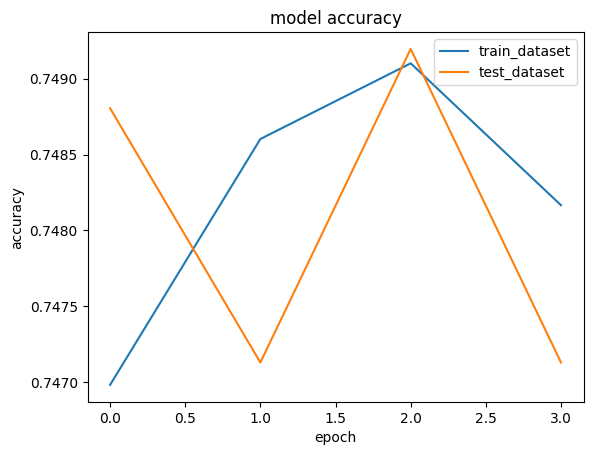

In [57]:
print(model3_lstm2.history.keys())
plt.plot(model3_lstm2.history['AUC'])
plt.plot(model3_lstm2.history['val_AUC'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_dataset', 'test_dataset'])
plt.show()

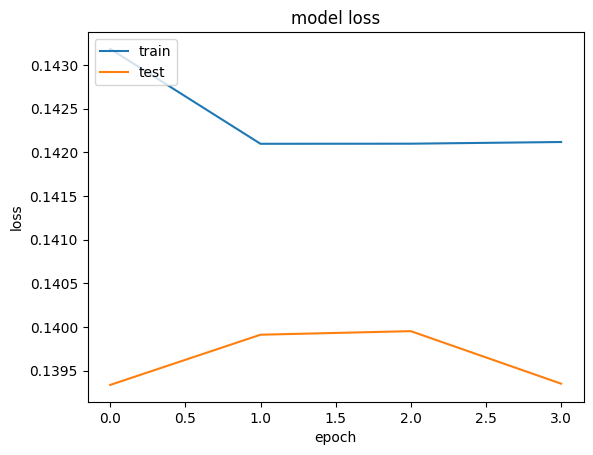

In [58]:
plt.plot(model3_lstm2.history['loss'])
plt.plot(model3_lstm2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Now performing hyperparameter tuning:

In [62]:
tokken=Tokenizer(num_words = 40000)  #increased the number of words
tokken.fit_on_texts(data_tr)
tr_final = tokken.texts_to_sequences(data_tr)
ts_final = tokken.texts_to_sequences(data_ts)

In [63]:
#sequece padding
tr_padded =pad_sequences(tr_final, maxlen=150)
ts_padded =pad_sequences(ts_final, maxlen=150)
print(tr_padded.shape)
print(ts_padded.shape)

(159571, 150)
(153164, 150)


In [64]:
"""
here we have created an object for sequential model as we need to pass our data in a sequential format

"""
model = Sequential() 
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid')) #here I have changed the activation layer from softmax to sigmoidal
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
x_train, x_test, y_train, y_test = train_test_split(tr_padded, train_categories, shuffle = True, random_state = 123)
model3_lstm3=model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_data = (x_test, y_test))

Epoch 1/3
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 597s 158ms/step - AUC: 0.9051 - loss: 0.0998 - val_AUC: 0.9808 - val_loss: 0.0482
Epoch 2/3
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 612s 164ms/step - AUC: 0.9841 - loss: 0.0459 - val_AUC: 0.9805 - val_loss: 0.0468
Epoch 3/3
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 547s 146ms/step - AUC: 0.9886 - loss: 0.0400 - val_AUC: 0.9788 - val_loss: 0.0477


After hyperparameter tuning our model is giving accuracy of .97 which is highest among all the single dense layer LSTM I have implemented above

dict_keys(['AUC', 'loss', 'val_AUC', 'val_loss'])


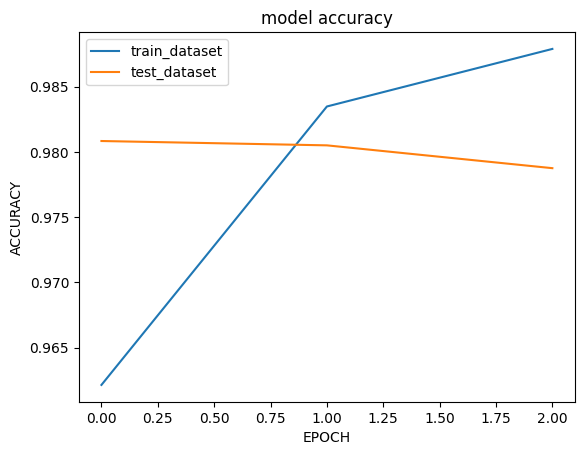

In [67]:
print(model3_lstm3.history.keys())
plt.plot(model3_lstm3.history['AUC'])
plt.plot(model3_lstm3.history['val_AUC'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('model accuracy')
plt.legend(['train_dataset', 'test_dataset'])
plt.show()

In [69]:
print(model3_lstm3.history['val_AUC'])

[0.9808377623558044, 0.9805049896240234, 0.9787566065788269]


In [71]:
lstm_accuracy=model3_lstm3.history['val_AUC'][2:]
lstm_accuracy[0]

0.9787566065788269

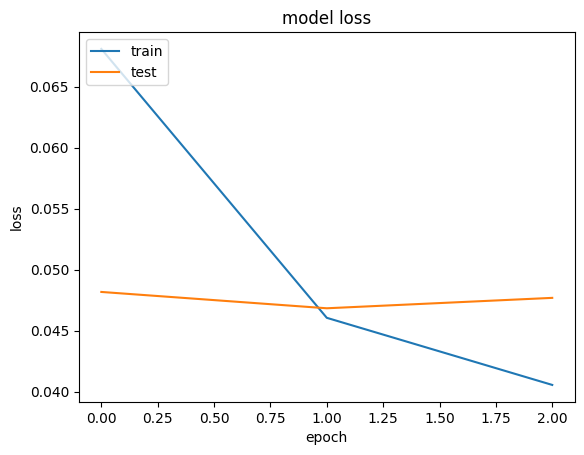

In [72]:
plt.plot(model3_lstm3.history['loss'])
plt.plot(model3_lstm3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
pred = model.predict(ts_padded) #testing the model on testing dataset
pred


4787/4787 ━━━━━━━━━━━━━━━━━━━━ 130s 27ms/step


array([[9.9320209e-01, 1.6479181e-01, 9.6628153e-01, 3.9014328e-02,
        8.5687810e-01, 1.4249539e-01],
       [9.2211389e-04, 5.2620462e-06, 1.6048431e-04, 6.0628445e-05,
        1.7847661e-04, 4.8297443e-05],
       [1.2620954e-02, 7.6442222e-05, 2.2262244e-03, 7.3592592e-04,
        2.7079761e-03, 6.6200219e-04],
       ...,
       [7.2937168e-04, 2.3226726e-06, 8.7116605e-05, 3.6717993e-05,
        8.1431775e-05, 2.7076168e-05],
       [1.9349636e-03, 3.9521383e-06, 1.8448495e-04, 6.8176865e-05,
        2.0469594e-04, 5.3879696e-05],
       [9.7661287e-01, 4.0222332e-02, 8.9897645e-01, 1.2198258e-02,
        6.9414741e-01, 5.7342194e-02]], dtype=float32)